In [1]:
import os
os.chdir("/home/gridsan/qwang/urban-control/")

%load_ext autoreload
%autoreload 2

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/validation/20250416_validation_set.csv")
# df = pd.read_csv("data/train/20250414_v4_train.csv")
# val = pd.read_csv("data/train/20250416_v2_validation.csv")
# df0413 = pd.read_csv("data/train/20250413.csv")


In [3]:
sample = df.sample(10)

In [4]:
df['generated_image'] = df['image_column']

city_name        x        y  x_offset  y_offset  \
0           la  11166.0  26135.0         0         0   
1           la  11173.0  26140.0         0         0   
2           la  11174.0  26123.0         0         0   
3           la  11176.0  26135.0         0         0   
4           la  11177.0  26123.0         0         0   
...        ...      ...      ...       ...       ...   
6195   chicago  16831.0  24407.0         5         5   
6196   chicago  16831.0  24435.0         5         5   
6197   chicago  16831.0  24447.0         5         5   
6198   chicago  16832.0  24404.0         5         5   
6199   chicago  16832.0  24428.0         5         5   

                                           image_column  \
0        data/satellite_tiles/la/16+0+0/11166/26135.png   
1        data/satellite_tiles/la/16+0+0/11173/26140.png   
2        data/satellite_tiles/la/16+0+0/11174/26123.png   
3        data/satellite_tiles/la/16+0+0/11176/26135.png   
4        data/satellite_tiles/la/16+0+0/11177/26123.png   
...                                                 ...   
6195  data/satellite_tiles/chicago/16+5+5/16831/2440...   
6196  data/satellite_tiles/chicago/16+5+5/16831/2443...   
6197  data/satellite_tiles/chicago/16+5+5/16831/2444...   
6198  data/satellite_tiles/chicago/16+5+5/16832/2440...   
6199  data/satellite_tiles/chicago/16+5+5/16832/2442...   

                              conditioning_image_column  
0     data/satellite_tiles_control_base/la/16+0+0/11...  
1     data/satellite_tiles_control_base/la/16+0+0/11...  
2     data/satellite_tiles_control_base/la/16+0+0/11...  
3     data/satellite_tiles_control_base/la/16+0+0/11...  
4     data/satellite_tiles_control_base/la/16+0+0/11...  
...                                                 ...  
6195  data/satellite_tiles_control_base/chicago/16+5...  
6196  data/satellite_tiles_control_base/chicago/16+5...  
6197  data/satellite_tiles_control_base/chicago/16+5...  
6198  data/satellite_tiles_control_base/chicago/16+5...  
6199  data/satellite_tiles_control_base/chicago/16+5...  

[6200 rows x 7 columns]

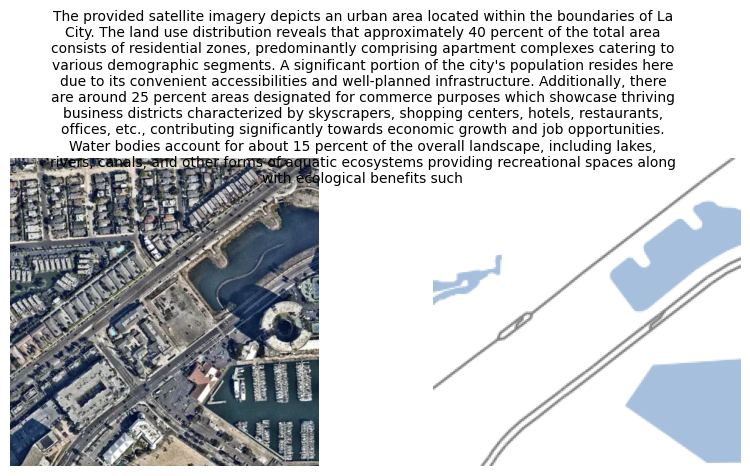

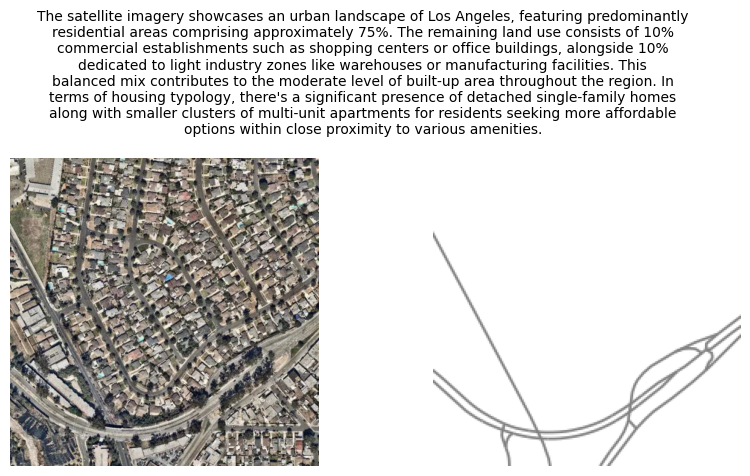

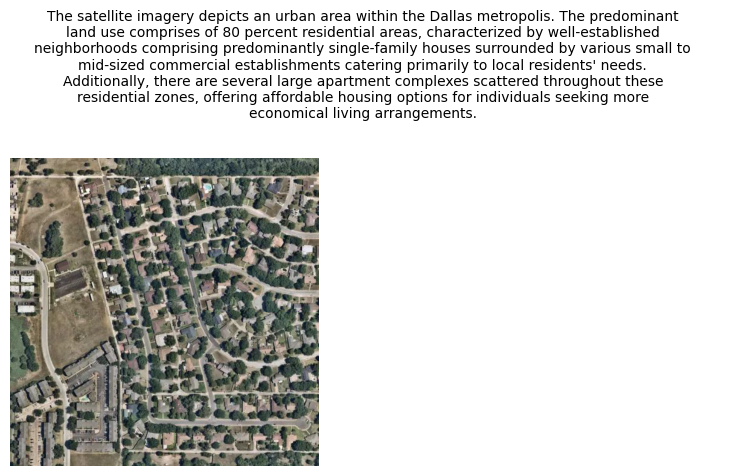

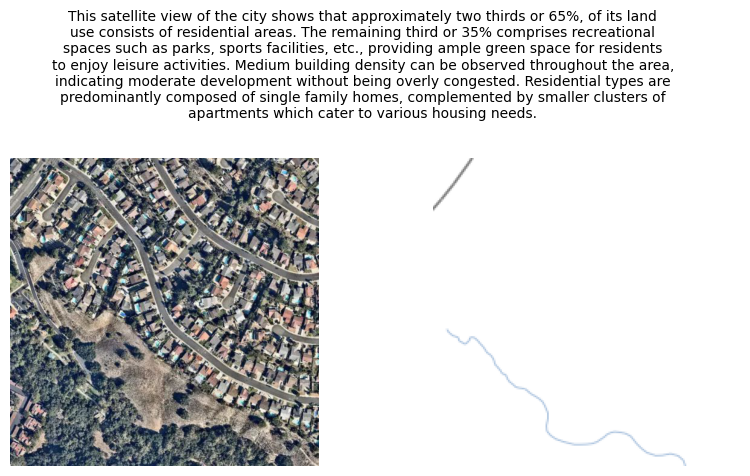

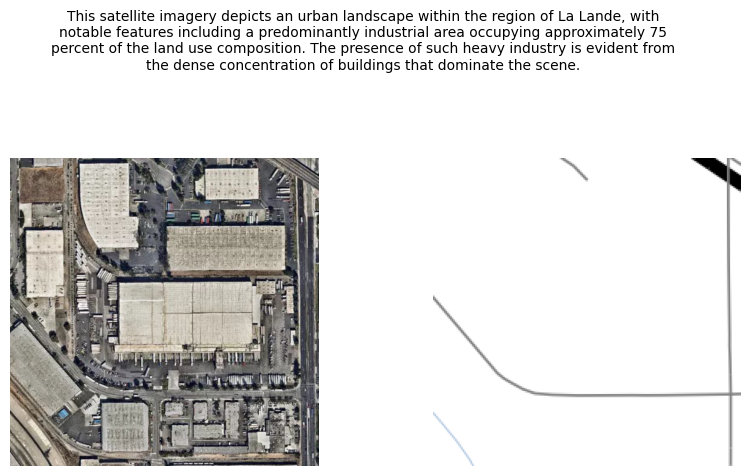

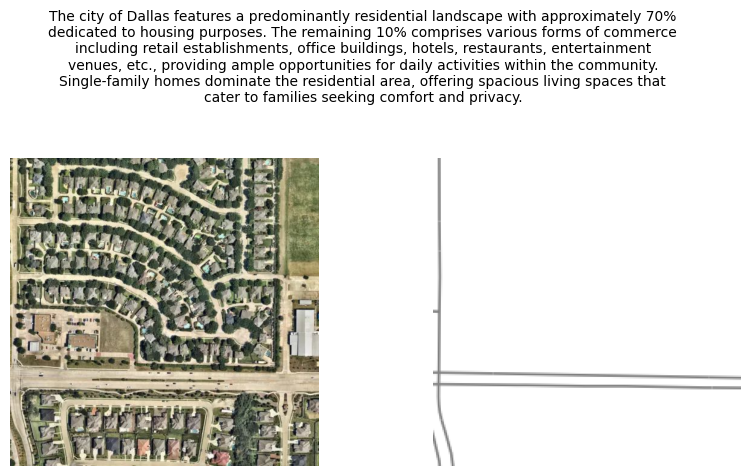

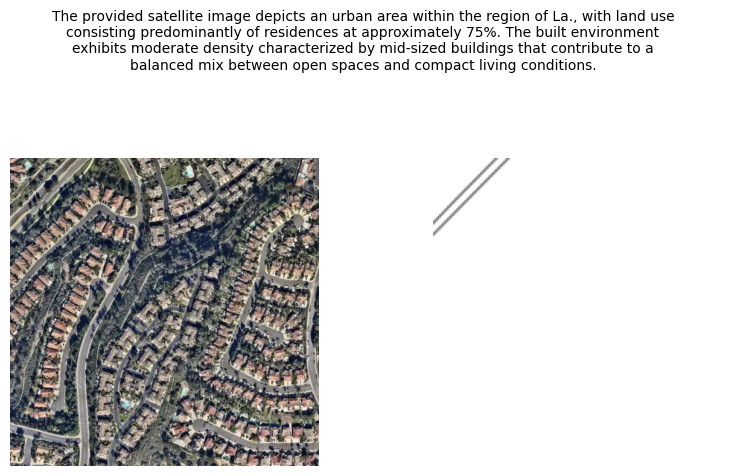

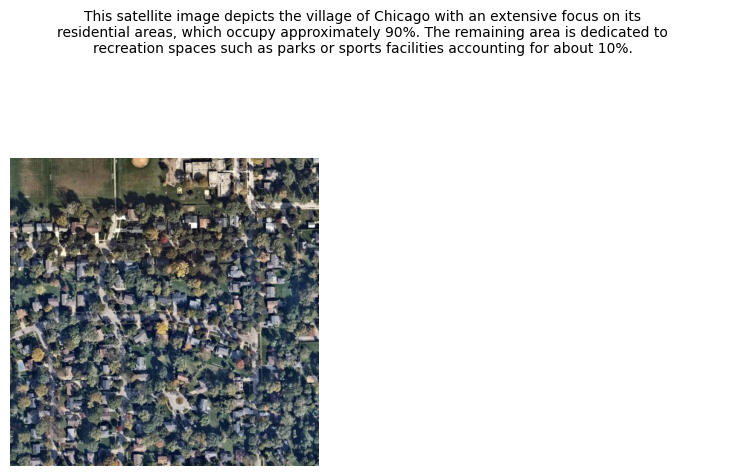

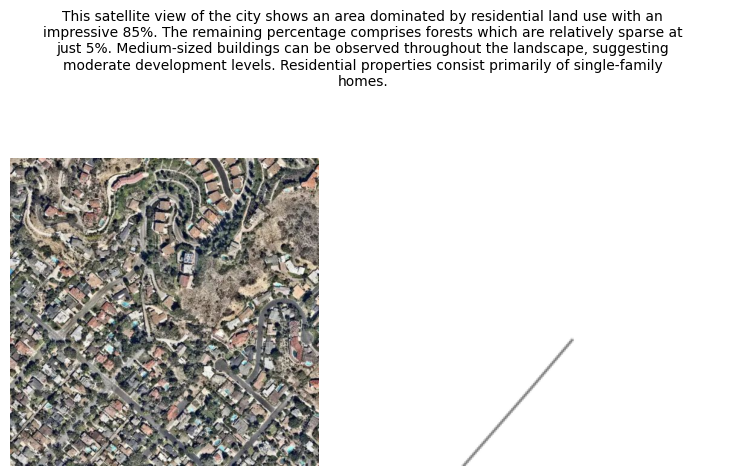

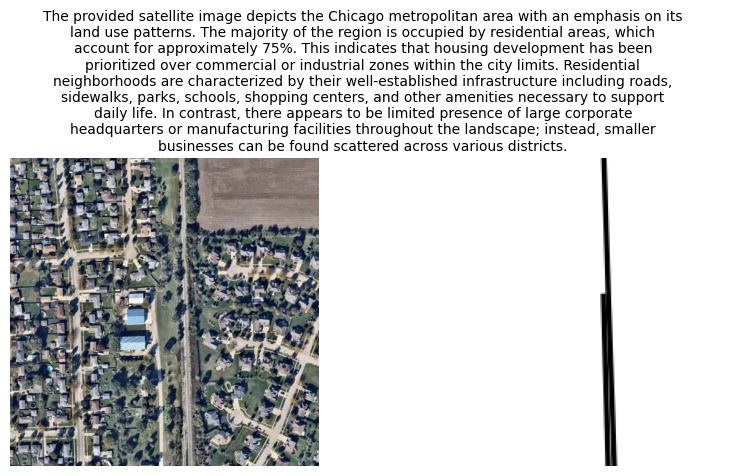

In [7]:
import textwrap

for i in range(len(sample)):
    
    target_image = Image.open(sample.iloc[i]['image_column']).convert("RGB")
    control_image = Image.open(sample.iloc[i]['conditioning_image_column']).convert("RGB")

    fig, ax = plt.subplots(1,2, figsize=(10, 4))

    ax[0].imshow(target_image)
    ax[1].imshow(control_image)
    ax[0].axis('off')
    ax[1].axis('off')    
    wrapped_title = textwrap.fill(sample.iloc[i]['llm_caption'], width=90)  # Adjust width as needed
    fig.suptitle(wrapped_title, y=1.25, fontsize=10)  # y>1.0 moves title up slightly

In [53]:
df0414[df0414['caption'].str.split(" ").str.len() > 60]['caption'].str.split(" ").str.len().max()

78

In [68]:
sample.iloc[-2]['caption']

"The area shown in the satellite image of dallas falls within the city. Furthermore, you'll find mostly residential (60%) in this zone , complemented by industrial (30%) . This area has a medium building density. Furthermore, a industrial patch appears in the lower central region of the image in shaded purple. Additionally, single-family homes structures dominate the residential areas , mixed with apartment complexes residences."